In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import scipy.stats as st

In [2]:
world_death = pd.read_csv('death-rates-from-air-pollution.csv')
world_emissions = pd.read_csv('co2_emission.csv')
world_emissions = world_emissions.loc[world_emissions['Year'] >= 1990]
world_death = pd.DataFrame(world_death)
world_emissions = pd.DataFrame(world_emissions)
combined_df =  world_death.merge(world_emissions, how='outer', on = ["Entity","Year"])
combined_df = combined_df.dropna(axis=0, how="any")
combined_df.drop(['Code_y'], axis=1,inplace=True)
world_df = combined_df.loc[combined_df['Entity'] == 'World']
combined_df = combined_df.loc[combined_df['Entity'] != 'World']
combined_df


,Entity,Code_x,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442,2602407.59
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960,2426486.16
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822,1381521.84
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266,1333837.11
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922,1282488.38
...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,143.850145,113.456097,27.589603,4.426291,11536239.29
6464,Zimbabwe,ZWE,2014,138.200536,108.703566,26.760618,4.296971,11866348.41
6465,Zimbabwe,ZWE,2015,132.752553,104.340506,25.715415,4.200907,10907603.94
6466,Zimbabwe,ZWE,2016,128.692138,100.392287,25.643570,4.117173,9932649.88


In [3]:
analytics_df = pd.DataFrame()
country_group = combined_df.groupby(['Entity'])
analytics_df['mean'] = country_group['Air pollution (total) (deaths per 100,000)'].mean()
analytics_df['median']= country_group['Air pollution (total) (deaths per 100,000)'].median()
analytics_df['variance'] = country_group['Air pollution (total) (deaths per 100,000)'].var()
analytics_df['standard_deviation'] = country_group['Air pollution (total) (deaths per 100,000)'].std()
analytics_df['SEM'] = country_group['Air pollution (total) (deaths per 100,000)'].sem()
analytics_df

,mean,median,variance,standard_deviation,SEM
Entity,,,,,
Afghanistan,252.842551,270.203219,1447.198535,38.042063,7.189274
Albania,59.291351,59.622406,205.435890,14.333035,2.708689
Algeria,53.680312,53.921732,53.409660,7.308191,1.381118
Andorra,21.150254,19.785442,18.094638,4.253779,0.803889
Angola,163.970719,168.538531,2023.055555,44.978390,8.500117
...,...,...,...,...,...
Venezuela,40.874961,39.385385,21.967943,4.686997,0.885759
Vietnam,81.837420,83.417953,162.175702,12.734822,2.406655
Yemen,133.563611,128.557998,911.133380,30.184986,5.704426


In [4]:
analytics_df2 = pd.DataFrame()
country_group2 = combined_df.groupby(['Entity'])
analytics_df2['mean'] = country_group['Indoor air pollution (deaths per 100,000)'].mean()
analytics_df2['median']= country_group['Indoor air pollution (deaths per 100,000)'].median()
analytics_df2['variance'] = country_group['Indoor air pollution (deaths per 100,000)'].var()
analytics_df2['standard_deviation'] = country_group['Indoor air pollution (deaths per 100,000)'].std()
analytics_df2['SEM'] = country_group['Indoor air pollution (deaths per 100,000)'].sem()
analytics_df2

,mean,median,variance,standard_deviation,SEM
Entity,,,,,
Afghanistan,203.967377,220.919258,1493.413067,38.644703,7.303162
Albania,35.145038,34.462431,180.455059,13.433356,2.538666
Algeria,1.503494,1.286284,1.156709,1.075504,0.203251
Andorra,0.397801,0.298552,0.064346,0.253666,0.047938
Angola,131.054799,134.785483,2081.316207,45.621445,8.621643
...,...,...,...,...,...
Venezuela,1.807818,1.170696,2.557285,1.599151,0.302211
Vietnam,51.177700,52.414226,286.081004,16.913929,3.196432
Yemen,87.386845,84.242415,1355.462539,36.816607,6.957685


In [5]:
analytics_df3 = pd.DataFrame()
country_group3 = combined_df.groupby(['Entity'])
analytics_df3['mean'] = country_group['Annual CO₂ emissions (tonnes )'].mean()
analytics_df3['median']= country_group['Annual CO₂ emissions (tonnes )'].median()
analytics_df3['variance'] = country_group['Annual CO₂ emissions (tonnes )'].var()
analytics_df3['standard_deviation'] = country_group['Annual CO₂ emissions (tonnes )'].std()
analytics_df3['SEM'] = country_group['Annual CO₂ emissions (tonnes )'].sem()
analytics_df3

,mean,median,variance,standard_deviation,SEM
Entity,,,,,
Afghanistan,4.353566e+06,1.512384e+06,1.942948e+13,4.407888e+06,8.330125e+05
Albania,3.939502e+06,4.206272e+06,2.028632e+12,1.424301e+06,2.691675e+05
Algeria,1.056165e+08,9.849364e+07,5.473628e+14,2.339579e+07,4.421388e+06
Andorra,4.899063e+05,5.012414e+05,2.622635e+09,5.121167e+04,9.678096e+03
Angola,1.832811e+07,1.564974e+07,1.327515e+14,1.152178e+07,2.177413e+06
...,...,...,...,...,...
Venezuela,1.594604e+08,1.664493e+08,6.944326e+14,2.635209e+07,4.980077e+06
Vietnam,8.874727e+07,8.203855e+07,3.239388e+15,5.691563e+07,1.075604e+07
Yemen,1.651064e+07,1.766038e+07,2.655745e+13,5.153392e+06,9.738996e+05


In [6]:
country_list = []
country_list1 = []
country_list2 = []
country_list3 = []
country_list4 = []
country_list5 = []
country_list6 = []
country_list7 = []
xticks_holder = []
counter2 = 1
xticks_holder2 = []
counter3 = 1
for country in combined_df['Entity']:
        if country_list.count(country) == 0:
            country_list.append(country)

            
for country in combined_df['Entity']:
    if counter2 < 31:
        if country_list1.count(country) == 0:
            country_list1.append(country)
            xticks_holder.append(counter2)
            counter2 = counter2 + 1
    elif counter2 < 61:         
        if country_list2.count(country) == 0:
            country_list2.append(country)
            counter2 = counter2 + 1            
    elif counter2 < 91:         
        if country_list3.count(country) == 0:
            country_list3.append(country)
            counter2 = counter2 + 1  
    elif counter2 < 121:         
        if country_list4.count(country) == 0:
            country_list4.append(country)
            counter2 = counter2 + 1  
    elif counter2 < 151:         
        if country_list5.count(country) == 0:
            country_list5.append(country)
            counter2 = counter2 + 1              
            
    elif counter2 < 181:         
        if country_list6.count(country) == 0:
            country_list6.append(country)
            counter2 = counter2 + 1              
            
    elif counter2 < 220:         
        if country_list7.count(country) == 0:
            country_list7.append(country)
            counter2 = counter2 + 1              
            xticks_holder2.append(counter3)
            counter3 = counter3 + 1


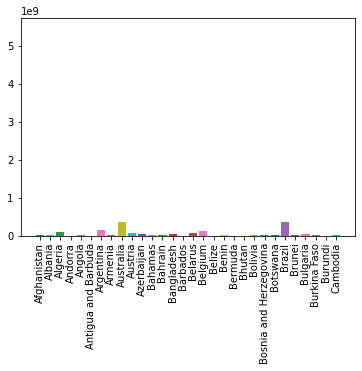

5741226725.928572

In [73]:
country_data_1 = []
china_limit = combined_df.loc[combined_df['Entity'] == 'China']['Annual CO₂ emissions (tonnes )'].mean()
for country in country_list1:
    country_loop1 = combined_df['Annual CO₂ emissions (tonnes )'].loc[combined_df['Entity'] == country].mean()
    
    country_data_1.append(country_loop1)
    plt.bar(country,country_loop1)
plt.ylim(top=china_limit)
plt.xticks(rotation=90)
plt.show()
china_limit

In [8]:
country_data_1b = []
for country in country_list1:
    country_loop1b = combined_df['Annual CO₂ emissions (tonnes )'].loc[combined_df['Entity'] == country]
    
    country_data_1b.append(country_loop1b)   
    quartiles = country_loop1b.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr
    upperoutl = 1.5*iqr + upperq
    loweroutl = lowerq - 1.5*iqr
    for x in country_loop1b:
        if x > upperoutl or x < loweroutl :
            print(f'{country}  {x}')

Azerbaijan  63052952.43
Azerbaijan  60800253.65
Azerbaijan  56175802.12
Bahamas  2799296.0
Bahamas  2414576.0
Bahamas  2516529.39
Bahamas  2565305.4
Bahamas  2564350.48
Barbados  741884.31
Belarus  104134684.0
Belarus  97040059.43
Belarus  89990445.67
Belarus  77615578.65
Bermuda  729136.0
Bhutan  919603.68
Bhutan  987956.94
Bhutan  1114581.02
Bhutan  1166358.05
Botswana  6986805.22
Botswana  7102967.37
Botswana  7098396.26
Botswana  7874985.93
Bulgaria  78672941.86
Burundi  431530.64
Burundi  476657.53
Burundi  508147.73
Burundi  529139.54


In [9]:
len(country_data_1b)

30

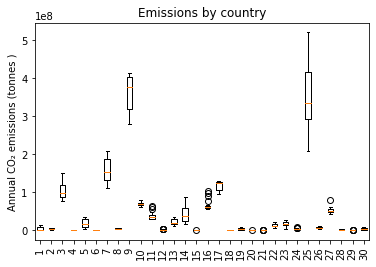

In [10]:
plt.title('Emissions by country')
plt.ylabel('Annual CO₂ emissions (tonnes )')
plt.boxplot(country_data_1b)
plt.xticks(rotation=90)

plt.show()

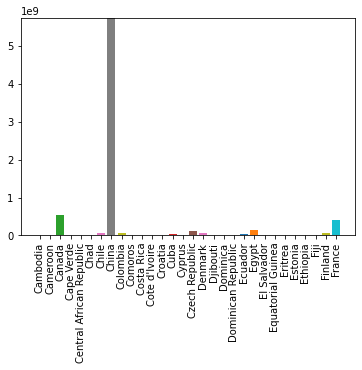

In [74]:
country_data_2 = []
for country in country_list2:
    country_loop2 = combined_df['Annual CO₂ emissions (tonnes )'].loc[combined_df['Entity'] == country].mean()
    
    country_data_2.append(country_loop2)
    plt.bar(country,country_loop2)
plt.ylim(top=china_limit)
plt.xticks(rotation=90)
plt.show()

In [12]:
country_data_2b = []
for country in country_list2:
    country_loop2b = combined_df['Annual CO₂ emissions (tonnes )'].loc[combined_df['Entity'] == country]
    
    country_data_2b.append(country_loop2b)   
    quartiles = country_loop2b.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr
    upperoutl = 1.5*iqr + upperq
    loweroutl = lowerq - 1.5*iqr
    for x in country_loop2b:
        if x > upperoutl or x < loweroutl :
            print(f'{country}  {x}')

Cote d'Ivoire  10854109.16
Cote d'Ivoire  10757541.88
Cote d'Ivoire  11724407.8
Czech Republic  164227402.0
Djibouti  788227.38
Djibouti  817008.26
Dominican Republic  9151661.33
Dominican Republic  9952623.95
Dominican Republic  10822336.86
Dominican Republic  11667178.89
Dominican Republic  12376794.03
El Salvador  2467169.72
El Salvador  3123868.16
El Salvador  3287506.07
Estonia  37068977.48
Estonia  34037705.0
Estonia  24514590.79
Ethiopia  12381426.48
Ethiopia  12941892.17
Ethiopia  13396240.84


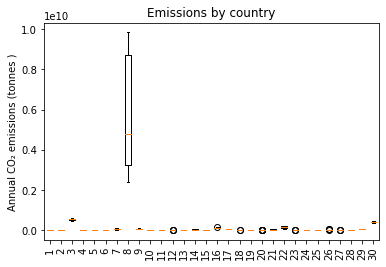

In [13]:
plt.title('Emissions by country')
plt.ylabel('Annual CO₂ emissions (tonnes )')
plt.boxplot(country_data_2b)
plt.xticks(rotation=90)

plt.show()

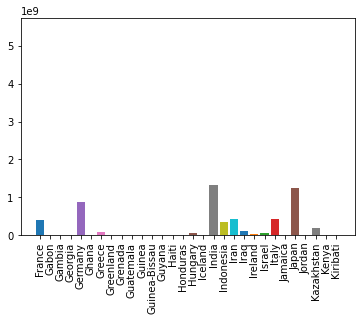

In [75]:
country_data_3 = []
for country in country_list3:
    country_loop3 = combined_df['Annual CO₂ emissions (tonnes )'].loc[combined_df['Entity'] == country].mean()
    
    country_data_3.append(country_loop3)
    plt.bar(country,country_loop3)
plt.ylim(top=china_limit)
plt.xticks(rotation=90)
plt.show()

In [15]:
country_data_3b = []
for country in country_list2:
    country_loop3b = combined_df['Annual CO₂ emissions (tonnes )'].loc[combined_df['Entity'] == country]
    
    country_data_3b.append(country_loop3b)   
    quartiles = country_loop3b.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr
    upperoutl = 1.5*iqr + upperq
    loweroutl = lowerq - 1.5*iqr
    for x in country_loop3b:
        if x > upperoutl or x < loweroutl :
            print(f'{country}  {x}')

Cote d'Ivoire  10854109.16
Cote d'Ivoire  10757541.88
Cote d'Ivoire  11724407.8
Czech Republic  164227402.0
Djibouti  788227.38
Djibouti  817008.26
Dominican Republic  9151661.33
Dominican Republic  9952623.95
Dominican Republic  10822336.86
Dominican Republic  11667178.89
Dominican Republic  12376794.03
El Salvador  2467169.72
El Salvador  3123868.16
El Salvador  3287506.07
Estonia  37068977.48
Estonia  34037705.0
Estonia  24514590.79
Ethiopia  12381426.48
Ethiopia  12941892.17
Ethiopia  13396240.84


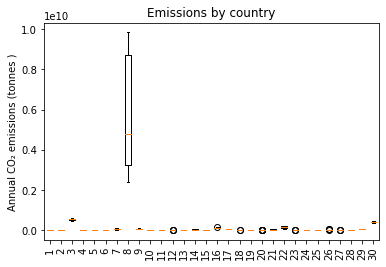

In [16]:
plt.title('Emissions by country')
plt.ylabel('Annual CO₂ emissions (tonnes )')
plt.boxplot(country_data_2b)
plt.xticks(rotation=90)

plt.show()

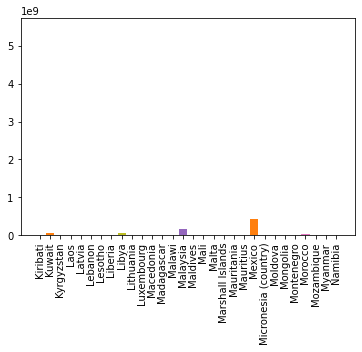

In [76]:
country_data_4 = []
for country in country_list4:
    country_loop4 = combined_df['Annual CO₂ emissions (tonnes )'].loc[combined_df['Entity'] == country].mean()
    
    country_data_4.append(country_loop4)
    plt.bar(country,country_loop4)
plt.ylim(top=china_limit)
plt.xticks(rotation=90)
plt.show()

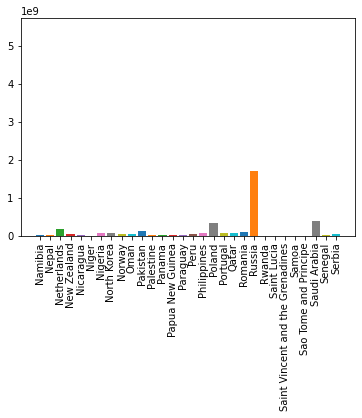

In [78]:
country_data_5 = []
for country in country_list5:
    country_loop5 = combined_df['Annual CO₂ emissions (tonnes )'].loc[combined_df['Entity'] == country].mean()
    
    country_data_5.append(country_loop5)
    plt.bar(country,country_loop5)
plt.ylim(top=china_limit)
plt.xticks(rotation=90)
plt.show()

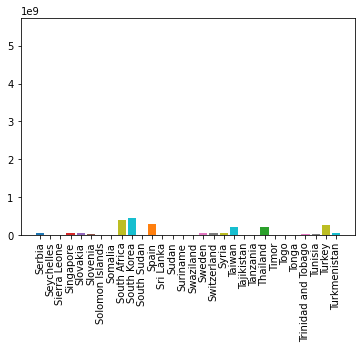

In [79]:
country_data_6 = []
for country in country_list6:
    country_loop6 = combined_df['Annual CO₂ emissions (tonnes )'].loc[combined_df['Entity'] == country].mean()
    
    country_data_6.append(country_loop6)
    plt.bar(country,country_loop6)
plt.ylim(top=china_limit)
plt.xticks(rotation=90)
plt.show()

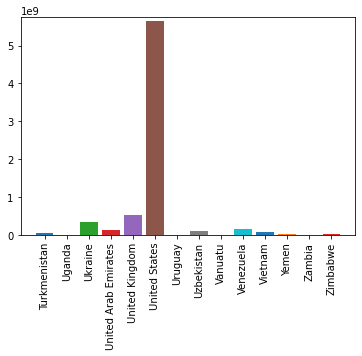

In [80]:
country_data_7 = []
for country in country_list7:
    country_loop7 = combined_df['Annual CO₂ emissions (tonnes )'].loc[combined_df['Entity'] == country].mean()
    
    country_data_7.append(country_loop7)
    plt.bar(country,country_loop7)
plt.ylim(top=china_limit)
plt.xticks(rotation=90)
plt.show()

In [17]:
combined_df.tail()

,Entity,Code_x,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Annual CO₂ emissions (tonnes )
6463,Zimbabwe,ZWE,2013,143.850145,113.456097,27.589603,4.426291,11536239.29
6464,Zimbabwe,ZWE,2014,138.200536,108.703566,26.760618,4.296971,11866348.41
6465,Zimbabwe,ZWE,2015,132.752553,104.340506,25.715415,4.200907,10907603.94
6466,Zimbabwe,ZWE,2016,128.692138,100.392287,25.643570,4.117173,9932649.88
6467,Zimbabwe,ZWE,2017,125.028843,96.235996,26.166182,4.052495,10397718.47


In [18]:
country_data = []
for country in country_list:
    country_loop = combined_df['Air pollution (total) (deaths per 100,000)'].loc[combined_df['Entity'] == country]
    country_data.append(country_loop)
    quartiles = country_loop.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr
    upperoutl = 1.5*iqr + upperq
    loweroutl = lowerq - 1.5*iqr
    
    for x in country_loop:
        if x > upperoutl or x < loweroutl :
            print(f'{country}  {x}')

Bangladesh  109.40404314209871
Bangladesh  108.52547816698328
Belarus  52.68628081874557
Belarus  50.785542548561324
Belarus  50.7119499458568
Botswana  111.81707771953677
Botswana  107.98255460968159
Botswana  103.48233640037012
Botswana  98.29036673508546
Botswana  93.86793415566036
Botswana  89.17545942463941
Botswana  69.80400607591162
Brunei  47.634960325348274
Dominican Republic  47.11629528792364
Dominican Republic  45.25602999128172
Dominican Republic  43.194150839280965
Dominican Republic  42.29925506317322
Ecuador  47.71063935166995
Ecuador  48.83898616805647
Ecuador  47.18930004021041
Ecuador  44.8477228757514
Ecuador  29.05272340252255
Ecuador  28.041828651523147
Ecuador  27.55363736770889
Ecuador  27.135242910048547
Ghana  110.73096213684073
Ghana  111.13618841928104
Ghana  109.08762408781466
Ghana  105.43693391989392
Grenada  90.94120059147585
Grenada  86.36907290995197
Kiribati  156.12519549052615
Kiribati  153.74024119230128
Libya  61.910401205137994
Libya  71.888615163

In [19]:
len(country_list)

188

The correlation between both factors is 0.07
The linear regression equation is y = 0.0x + 34.78


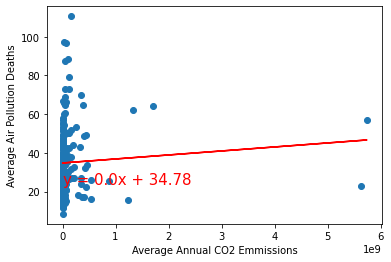

In [20]:
x_axis2 = country_group['Annual CO₂ emissions (tonnes )'].mean()
y_axis2 = country_group['Outdoor particulate matter (deaths per 100,000)'].mean()
correlation = st.pearsonr(x_axis2,y_axis2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis2, y_axis2)
regress_values = x_axis2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis2,y_axis2)
plt.plot(x_axis2,regress_values,"r-")
plt.annotate(line_eq,(34,24),fontsize=15,color="red")
plt.xlabel('Average Annual CO2 Emmissions')
plt.ylabel('Average Air Pollution Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The linear regression equation is {line_eq}')
plt.show()

In [21]:
combined_df.head()

,Entity,Code_x,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442,2602407.59
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960,2426486.16
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822,1381521.84
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266,1333837.11
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922,1282488.38


In [22]:
year_group = pd.DataFrame()
year_group = combined_df.loc[(combined_df['Year'] == 2017) & (combined_df['Annual CO₂ emissions (tonnes )'] != 0)]
year_group

,Entity,Code_x,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Annual CO₂ emissions (tonnes )
27,Afghanistan,AFG,2017,183.941387,134.993753,45.737662,5.810625,1.301474e+07
55,Albania,ALB,2017,40.481124,18.280754,20.837393,1.803884,6.379207e+06
83,Algeria,DZA,2017,43.683512,0.191767,41.976233,2.052064,1.505514e+08
167,Andorra,AND,2017,15.569478,0.165664,13.088531,2.708944,5.201838e+05
195,Angola,AGO,2017,95.219909,62.199058,29.759293,5.029588,3.538993e+07
...,...,...,...,...,...,...,...,...
6243,Venezuela,VEN,2017,34.746922,0.472981,33.052264,1.501719,1.595676e+08
6271,Vietnam,VNM,2017,60.317533,25.636264,32.800211,2.634434,1.988265e+08
6411,Yemen,YEM,2017,96.501351,36.355334,58.039785,3.107451,1.896575e+07
6439,Zambia,ZMB,2017,98.869963,74.844720,21.537253,4.015376,4.746148e+06


In [23]:
country_data9 = []
for country in country_list:
    country_loop9 = year_group['Air pollution (total) (deaths per 100,000)'].loc[year_group['Entity'] == country]
    country_data9.append(country_loop9)
    quartiles = country_loop9.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr
    upperoutl = 1.5*iqr + upperq
    loweroutl = lowerq - 1.5*iqr
    
    for x in country_loop9:
        if x > upperoutl or x < loweroutl :
            print(f'{country}  {x}')

In [24]:
country_data8 = []
for country in country_list:
    country_loop8 = year_group['Annual CO₂ emissions (tonnes )'].loc[year_group['Entity'] == country]
    country_data8.append(country_loop8)
    quartiles = country_loop8.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr
    upperoutl = 1.5*iqr + upperq
    loweroutl = lowerq - 1.5*iqr
    
    for x in country_loop8:
        if x > upperoutl or x < loweroutl :
            print(f'{country}  {x}')

The correlation between both factors is 0.08
The linear regression equation is y = 0.0x + 30.74


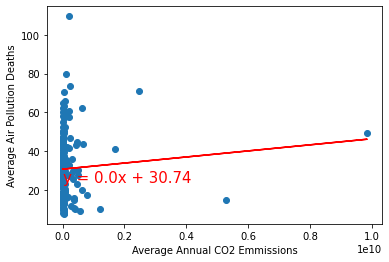

In [25]:
x_axis2 = year_group['Annual CO₂ emissions (tonnes )']
y_axis2 = year_group['Outdoor particulate matter (deaths per 100,000)']
correlation = st.pearsonr(x_axis2,y_axis2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis2, y_axis2)
regress_values = x_axis2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis2,y_axis2)
plt.plot(x_axis2,regress_values,"r-")
plt.annotate(line_eq,(34,24),fontsize=15,color="red")
plt.xlabel('Average Annual CO2 Emmissions')
plt.ylabel('Average Air Pollution Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The linear regression equation is {line_eq}')
plt.show()

In [39]:
top_bottom_df = pd.DataFrame()
top_bottom_df['Country'] = combined_df['Entity']
top_bottom_df['Annual CO₂ emissions (tonnes)'] = combined_df['Annual CO₂ emissions (tonnes )']
top_bottom_df['Year'] = combined_df['Year']
top_bottom_df['Outdoor particulate matter (deaths per 100,000)'] = combined_df['Outdoor particulate matter (deaths per 100,000)']
top_bottom_df = top_bottom_df.loc[top_bottom_df['Year'] == 2017]



In [40]:
top_df = top_bottom_df.sort_values(by='Annual CO₂ emissions (tonnes)', ascending=False)
top_df = top_df.iloc[:10]
top_df

,Country,Annual CO₂ emissions (tonnes),Year,"Outdoor particulate matter (deaths per 100,000)"
1287,China,9.838754e+09,2017,49.367142
6103,United States,5.269530e+09,2017,15.043925
2687,India,2.466765e+09,2017,70.803435
4703,Russia,1.692795e+09,2017,41.358185
2911,Japan,1.205061e+09,2017,10.292936
2183,Germany,7.993732e+08,2017,17.597898
2743,Iran,6.723123e+08,2017,43.691643
4871,Saudi Arabia,6.350111e+08,2017,62.143097
5235,South Korea,6.160967e+08,2017,20.123075
979,Canada,5.727826e+08,2017,9.110733


In [41]:
bottom_df = top_bottom_df.sort_values(by='Annual CO₂ emissions (tonnes)', ascending=True)
bottom_df = bottom_df.iloc[:10]
bottom_df

,Country,Annual CO₂ emissions (tonnes),Year,"Outdoor particulate matter (deaths per 100,000)"
3023,Kiribati,73409.05,2017,15.174841
4843,Sao Tome and Principe,117472.48,2017,33.315773
3611,Marshall Islands,120909.02,2017,38.104271
5823,Tonga,142499.92,2017,24.602742
1651,Dominica,144248.05,2017,30.837473
3723,Micronesia (country),177045.35,2017,32.305456
6215,Vanuatu,181363.53,2017,18.803947
1343,Comoros,189481.66,2017,16.158609
4787,Saint Vincent and the Grenadines,222219.96,2017,38.212715
4815,Samoa,233181.68,2017,16.247599


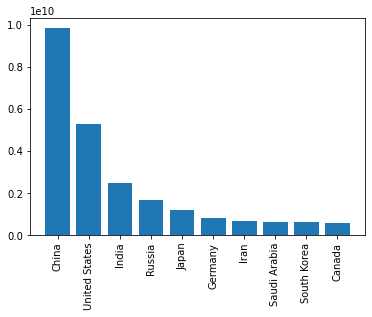

In [37]:
plt.bar(top_df['Country'],top_df['Annual CO₂ emissions (tonnes)'])
plt.xticks(rotation=90)
plt.show()

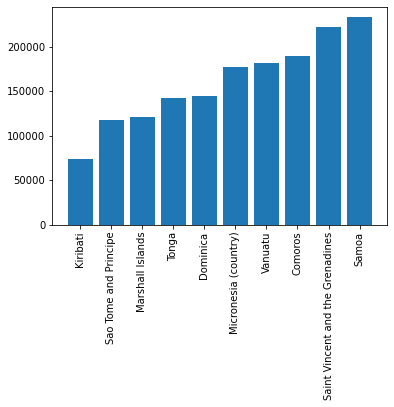

In [42]:
plt.bar(bottom_df['Country'],bottom_df['Annual CO₂ emissions (tonnes)'])
plt.xticks(rotation=90)
plt.show()

The correlation between both factors is 0.19
The linear regression equation is y = 0.0x + 30.55


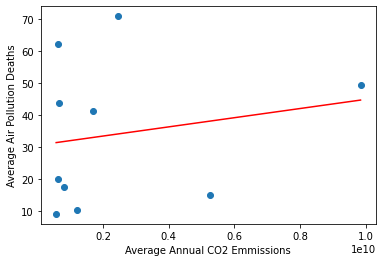

In [58]:
x_axis2 = top_df['Annual CO₂ emissions (tonnes)']
y_axis2 = top_df['Outdoor particulate matter (deaths per 100,000)']
correlation = st.pearsonr(x_axis2,y_axis2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis2, y_axis2)
regress_values = x_axis2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis2,y_axis2)
plt.plot(x_axis2,regress_values,"r-")
plt.annotate(line_eq,(.1,20),fontsize=15,color="red")
plt.xlabel('Annual CO2 Emmissions 2017')
plt.ylabel('Air Pollution Deaths 2017')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The linear regression equation is {line_eq}')
plt.show()

The correlation between both factors is -0.05
The linear regression equation is y = -0.0x + 27.74


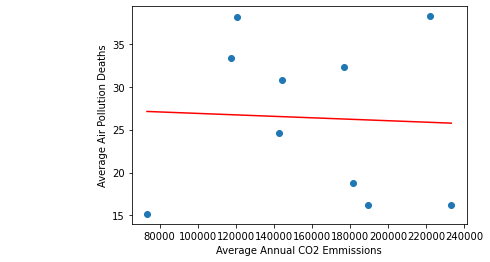

In [45]:
x_axis2 = bottom_df['Annual CO₂ emissions (tonnes)']
y_axis2 = bottom_df['Outdoor particulate matter (deaths per 100,000)']
correlation = st.pearsonr(x_axis2,y_axis2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis2, y_axis2)
regress_values = x_axis2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis2,y_axis2)
plt.plot(x_axis2,regress_values,"r-")
plt.annotate(line_eq,(34,24),fontsize=15,color="red")
plt.xlabel('Annual CO2 Emmissions 2017')
plt.ylabel('Air Pollution Deaths 2017')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The linear regression equation is {line_eq}')
plt.show()

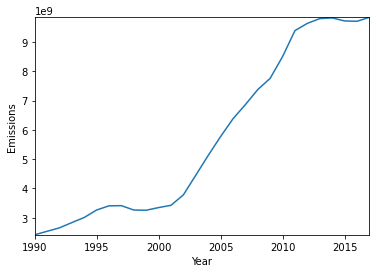

In [48]:
x_axis = combined_df_china['Year']
y_axis = combined_df_china['Annual CO₂ emissions (tonnes )']
plt.plot(x_axis,y_axis)
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())
plt.show()

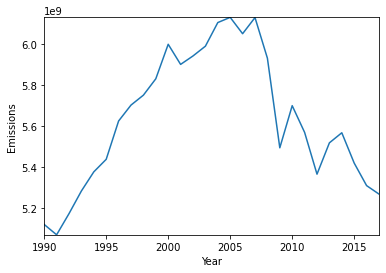

In [59]:
combined_df_us = combined_df.loc[combined_df['Entity'] == 'United States']
x_axis = combined_df_us['Year']
y_axis = combined_df_us['Annual CO₂ emissions (tonnes )']
plt.plot(x_axis,y_axis)
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())
plt.show()

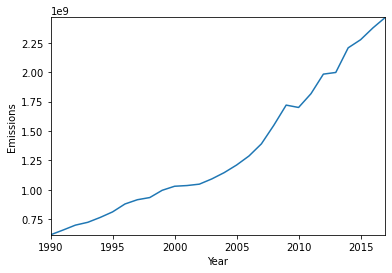

In [60]:
combined_df_india = combined_df.loc[combined_df['Entity'] == 'India']
x_axis = combined_df_india['Year']
y_axis = combined_df_india['Annual CO₂ emissions (tonnes )']
plt.plot(x_axis,y_axis)
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())
plt.show()

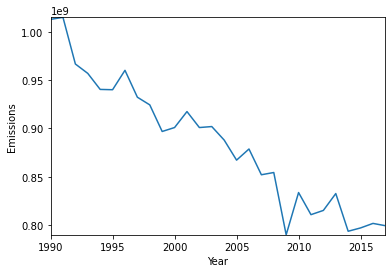

In [61]:
combined_df_germany = combined_df.loc[combined_df['Entity'] == 'Germany']
x_axis = combined_df_germany['Year']
y_axis = combined_df_germany['Annual CO₂ emissions (tonnes )']
plt.plot(x_axis,y_axis)
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())
plt.show()

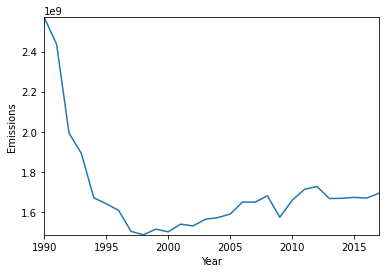

In [62]:
combined_df_russia = combined_df.loc[combined_df['Entity'] == 'Russia']
x_axis = combined_df_russia['Year']
y_axis = combined_df_russia['Annual CO₂ emissions (tonnes )']
plt.plot(x_axis,y_axis)
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())
plt.show()

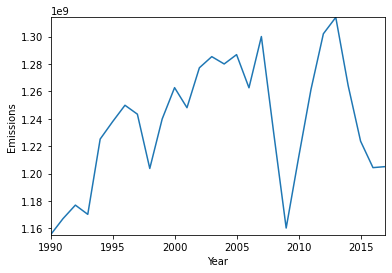

In [63]:
combined_df_japan = combined_df.loc[combined_df['Entity'] == 'Japan']
x_axis = combined_df_japan['Year']
y_axis = combined_df_japan['Annual CO₂ emissions (tonnes )']
plt.plot(x_axis,y_axis)
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())
plt.show()

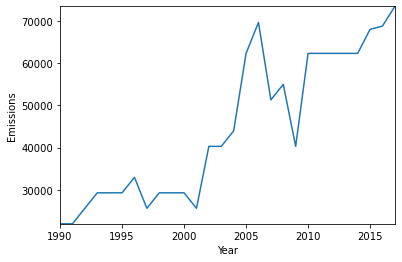

In [50]:
combined_df_kiribati = combined_df.loc[combined_df['Entity'] == 'Kiribati']
x_axis = combined_df_kiribati['Year']
y_axis = combined_df_kiribati['Annual CO₂ emissions (tonnes )']
plt.plot(x_axis,y_axis)
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())
plt.show()